# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 7</center>

# <center>Machine Learning Workflow</center>

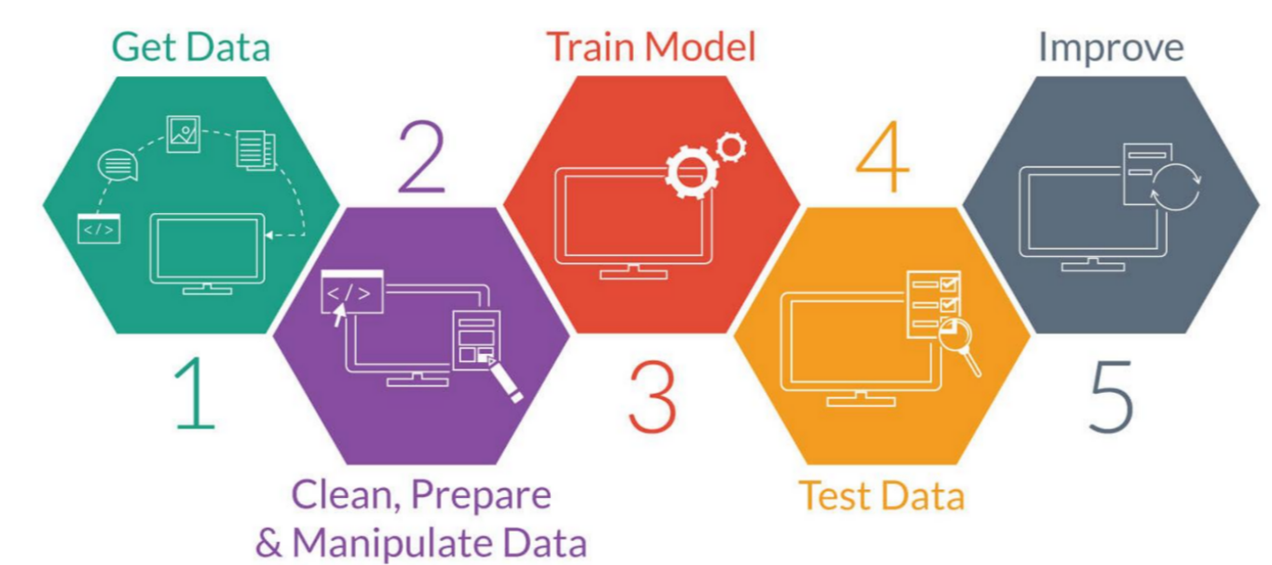

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Data Manipulation and Feature Engineering</li>
<li> Train Test Split</li>
<li> Train model </li>
<li> Test the Model</li>
<li> Make Predictions </li>
</ol>

## <font color = blue>0. Learning Objectives

Follow machine learning workflow to create machine learning model and evaluate the performance of the machine learning model.

By the end of the lab, you should be able to :
- Load dataset and perform necessary data engineering and feature engineering techniques on given dataset.


- Split given dataset into train and test set.


- Evaluate the model performance for both train and test dataset.




## <font color = blue>1. Loading Data

    - Load iris flower data from sklearn.datasets module. Create dataframe from the iris data.
    
    
### Different species of Iris Flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Dataset and Iris Attributes

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

In [8]:
#Load your data here
#Load the iris datasets using sklearn : Note you can also d/l from UCI and read using pd.read_csv
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()
iris.target_names



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [2]:
# Get the detail info on the dataset
# Such as: How are the data arranged, name of the column, units, missing values



In [3]:
#explore other keys in in the given data


In [14]:
#Usually I keep all the data in a Pandas dataframe.
#So we need to combine the features and targets(labels) into a single dataframe
import pandas as pd
#Add the features
idf = pd.DataFrame(iris.data, columns=iris.feature_names)
idf

#Add the label (target)

idf['target'] = iris.target
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
#use pandas basic methods to get result




## <font color = blue>2. Data Manipulation and Feature Engineering


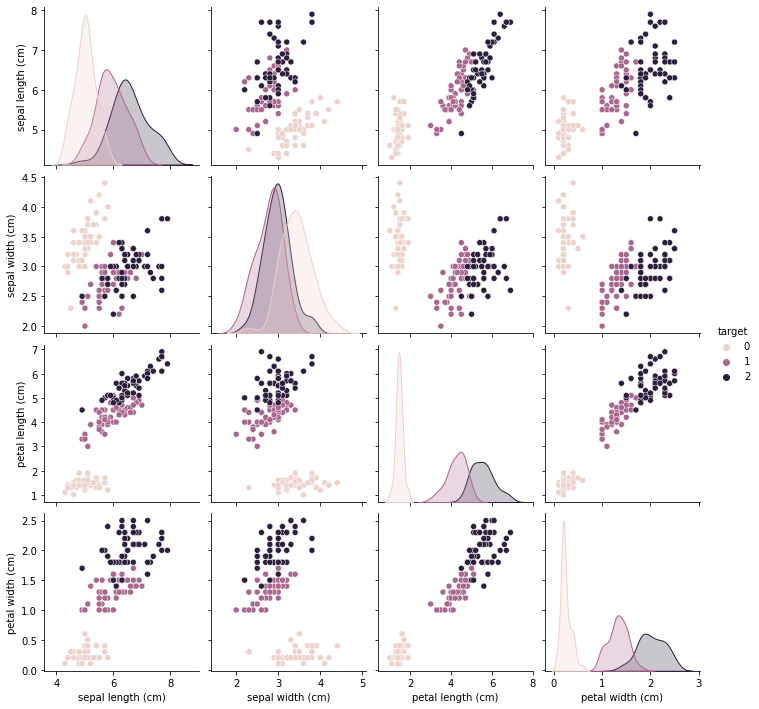

In [24]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
#Plot the distribution of each fetures of each class

sns.pairplot(idf, hue='target')



<AxesSubplot:>

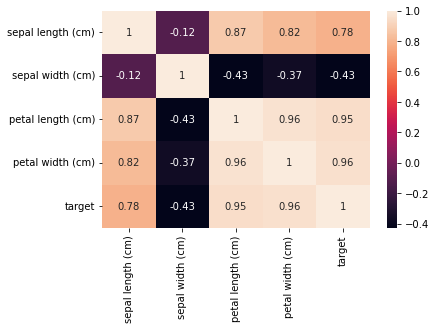

In [29]:
sns.heatmap(idf.corr(), annot=True)

In [9]:
#use pair plot to check relation




In [10]:
#Let's do correlation plot on the data to see how the each features are co-related

# A high correlation can help us use dimension reduction



## <font color = blue>3. Split data for train and test



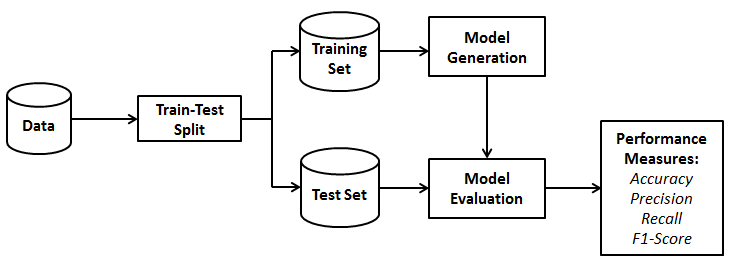

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [63]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
X = idf.drop(['target'], axis = 1)
y = idf.target
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5, stratify=idf.target)



In [34]:
y_train.shape

(120,)

In [40]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## <font color = blue>4. Training Model


In [45]:
#Import the estimators from the sklearn libraries
from sklearn.linear_model import LogisticRegression

#Train the model
model = LogisticRegression()
#Start the training   
model.fit(X_train, y_train)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## <font color = blue>5. Test Model


In [51]:
#Test out the model using some prediction

y_pred = model.predict(X_test)

In [47]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## <font color = blue>6. Model Evaluation
    
- Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses
    
    

### <font color = "blue">6.1 Accuracy Score

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
    
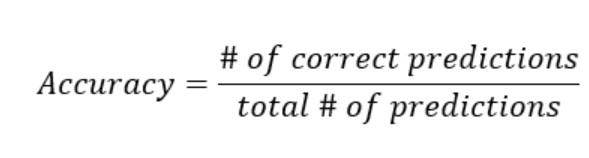

`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

In [50]:
# Find accuracy score for test data.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9666666666666667

## <font color = blue>5. Make Predictions


In [52]:
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [56]:
#Use predict method to make prediction to unseen data
x_val = [[6,3.9,2,0.9]]
value=model.predict(x_val)[0]
iris.target_names[0]


C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'setosa'

# TODO/ HOMEWORK


INSTRUCTIONS:

- Follow Machine learning Workflow and create model for boston housing dataset. 



- Compare train and test accuracy for the model.

In [58]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [60]:
import pandas as pd
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [61]:
bdf['target'] = boston.target
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [64]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
X_fetures = bdf[["RM","LSTAT", "TAX"]]
y_value = bdf.target
#Split the data into training and testing sets
X_training, X_testing, y_training, y_testing = train_test_split(X_fetures,y_value,test_size=0.2, random_state=5)


In [65]:
y_training.shape

(404,)

In [66]:
y_testing

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: target, Length: 102, dtype: float64

In [67]:
#creating model
from sklearn.linear_model import LinearRegression
md = LinearRegression()
md.fit(X_training, y_training)




LinearRegression()

In [75]:
#prediction of x Test
y_pr = md.predict(X_testing)


array([37.39403415, 30.10011872, 26.32274033,  0.43531221, 33.97759949,
        7.53791857, 30.96902469, 28.06601002, 25.99788027, 20.75878682,
       32.66120445, 23.94079438, 23.31099895, 31.62483392, 27.83274081,
       20.9724509 , -0.60998596, 17.99594995, 12.93016566, 20.30943792,
        4.35401329, 23.74554878, 37.80265993, 24.98141585, 30.00721441,
       11.95165846, 27.29088968, 22.26055358, 28.10755357, 28.4792213 ,
       13.43115882,  9.53680373, 16.89904367, 23.70635372, 26.46823904,
       22.79558148, 26.66091856, 11.76200085, 37.50726223, 33.66213976,
       19.0933843 ,  2.40110571, 27.84970183, 15.60265709, 27.75623903,
       29.75289979, -2.80217879, 18.74177145, 20.83294795, 14.4173968 ,
       20.96274152, 22.10405546, 24.95188153, 17.19623393, 17.80857112,
       27.89557024, 36.24248827, 18.74267099, 29.08233923, 21.34784839,
       20.30263161, 23.48785718, 16.65292595, 30.80710411, 21.16107836,
       12.17436325, 23.92345971, 26.43433432, 23.31216015, 20.13

In [76]:
y_testing

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: target, Length: 102, dtype: float64

In [80]:
from sklearn.metrics import mean_squared_error
y_pr = md.predict(X_testing)

MSE = mean_squared_error(y_pr,y_testing)
MSE


24.560135498767927

In [77]:
bdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [79]:
#prediction
x_sam = [[6.9,9.9,250]]
md.predict(x_sam)

C:\Users\Lab-1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.98955254])